In [9]:
from obspy import read, UTCDateTime
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pywt 
from scipy import stats
import scipy 


In [10]:
st = read('/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SismicWaves/data/raw/train/04010355.mseed')
tr = st[0]
print(tr.stats)


         network: IN
         station: BUEZ
        location: 
         channel: v
       starttime: 2024-04-01T03:55:42.329994Z
         endtime: 2024-04-01T03:56:12.129994Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 2981
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 4096})


In [11]:
data = tr.data
times = np.linspace(0, tr.stats.npts * tr.stats.delta, tr.stats.npts)


Media de la señal normalizada: -1.9068573921773906e-17
Medias:-0.00000000
Desviación estándar de la señal normalizada: 1.00000000


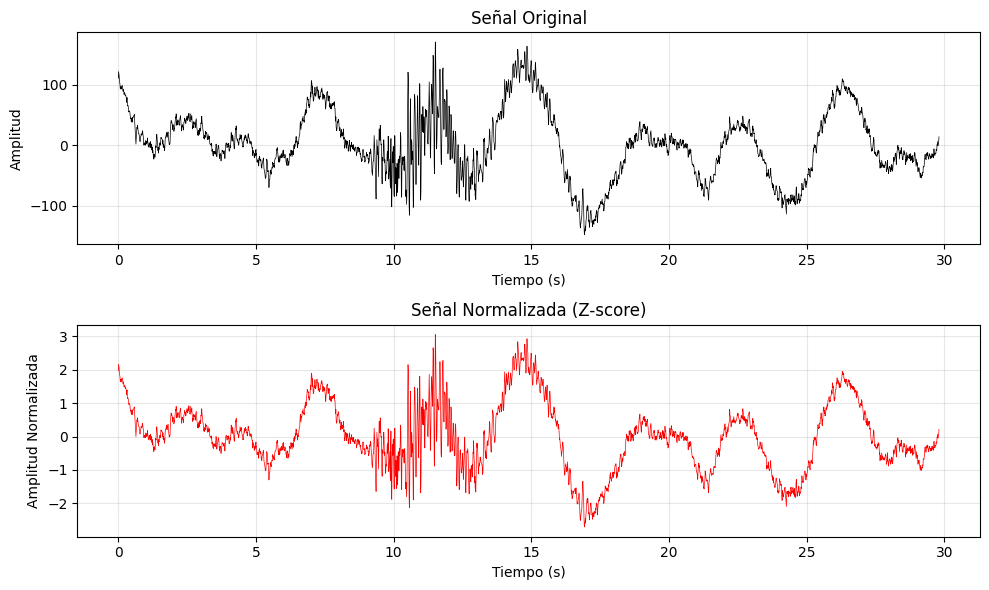

In [12]:
# Normalizar lo sdatos (Z-score normalization)
data_normalized = (data - np.mean(data)) / np.std(data)

# Visualizar la comparación entre la señál original y la señal normalizada
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Señal original
ax1.plot(times, data, 'k-', linewidth=0.5)
ax1.set_title('Señal Original')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud')
ax1.grid(True, alpha=0.3)

# Señal normalizada
ax2.plot(times, data_normalized, 'r-', linewidth=0.5)
ax2.set_title('Señal Normalizada (Z-score)')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud Normalizada')
ax2.grid(True, alpha=0.3)

plt.tight_layout()

# Verrificar la normalización 
print("Media de la señal normalizada:", np.mean(data_normalized))
print(f"Medias:{np.mean(data_normalized):.8f}")
print(f"Desviación estándar de la señal normalizada: {np.std(data_normalized):.8f}")

In [13]:
# Realizar la descomposición wavelet
coeffs = pywt.wavedec(data, 'db4', level=5)

# Analizar el primer segmento como prueba
level_test = 0
coef = coeffs[level_test]

# Calcular estadísticas básicas: 

stats = {
    'mean': np.mean(coef),
    'std': np.std(coef),
    'min': np.min(coef),
    'max': np.max(coef),
    'median': np.median(coef),
    'skewness': stats.skew(coef), #Assimetria 
    'kurtosis': stats.kurtosis(coef), # que es eso 
    'mean energy': np.mean(coef**2),
    'median energy': np.median(coef**2),
    'variance': np.var(coef),
    'total energy': np.sum(coef**2),
}

df_stats = pd.DataFrame(list(stats.items()), columns=['Statistic', 'Value'])
df_stats['Value'] = df_stats['Value'].apply(lambda x: f"{x:.4f}")  # Formato de 4 decimales

display(df_stats)

,Statistic,Value
0,mean,45.6638
1,std,324.2465
2,min,-683.6456
3,max,736.8757
4,median,15.4214
5,skewness,0.1778
6,kurtosis,-0.3351
7,mean energy,107220.9547
8,median energy,37643.1597
9,variance,105135.7724


In [14]:
# Leer datos del CSV
df = pd.read_csv("/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SismicWaves/data/raw/VT_P_training.csv",
                 parse_dates=['eve_fecha'])  # Parsear la columna de fecha
file_name = 4010936  # Ejemplo del archivo que mencionaste

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   eve_fecha  2500 non-null   datetime64[ns]
 1   archivo    2500 non-null   int64         
 2   lec_p      2500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 58.7 KB


,eve_fecha,archivo,lec_p
0,2024-04-01 03:55:42,4010355,1.711944e+09
1,2024-04-01 09:19:05,4010919,1.711963e+09
2,2024-04-01 09:36:45,4010936,1.711964e+09
3,2024-04-01 17:49:27,4011749,1.711994e+09
4,2024-04-02 01:30:23,4020130,1.712021e+09


In [133]:
df = pd.read_csv("/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SismicWaves/data/raw/VT_P_training.csv")
file_name = 1010056

In [ ]:
# Leer tiempo p del CSV
p_time = UTCDateTime(float(df.loc[df['archivo'] == file_name, 'lec_p'].values[0]))
print